# Setup

In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Preparação do Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/My Drive/df_norm.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'M_mean_int', 'F_std_int', 'ano_nascimento',
       'qnt_salarios', 'companhia_mae', 'companhia_parentes_amigos',
       'companhia_sozinho', 'estado_civil_nao_declarado', 'uniao_estavel',
       'descricao_mae_escolaridade', 'ensino_fundamental_conclusao', 'publica',
       'sem_estudar_sim', 'sem_estudar_NAN', 'conhecimento_idiomas',
       'conhecimento_informatica', 'conhecimento_informatica_nan',
       'respTrabBeneficirioouPensionistadoINSS', 'respTrabEstgiooubolsa',
       'respTrabNuncatrabalhou', 'respTrabNoesttrabalhando',
       'respTrabNoinformado', 'respFinCnjuge', 'respFinIrmo',
       'respFinNoinformado', 'respFinOprprioaluno', 'preta', 'indigena',
       'res_nao_informado', 'res_quilombola', 'res_rural', 'res_urbana',
       'statusImovelFinanciado', 'statusImovelCedidoouEmprestado',
       'statusImovelNoinformado', 'statusImovelOutro',
       'statusImovelPensionatoouAlojamento', 'statusImovelPrprio',
       'trabAlunoEstgiooubolsa', 'trabAlun

In [5]:
colunas_del = ['Unnamed: 0',
       'cluster_kmodes', 'cluster_kprototypes', 'silhouette_hamming_kmodes',
       'silhouette_hamming_kprototypes', 'silhouette_jaccard_kmodes',
       'silhouette_jaccard_kprototypes', 'silhouette_sokalmichener_kmodes',
       'silhouette_sokalmichener_kprototypes', 'silhouette_yule_kmodes',
       'silhouette_yule_kprototypes']
df = df.drop(columns = colunas_del)

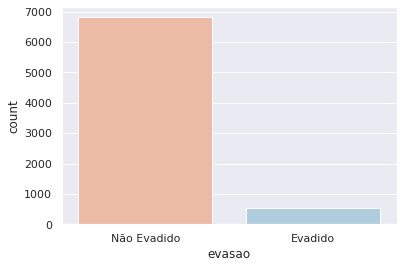

In [59]:
plt.figure()
sns.countplot(x="evasao", data=df, palette='RdBu')
plt.xticks([0,1], ['Não Evadido', 'Evadido'])
plt.show()

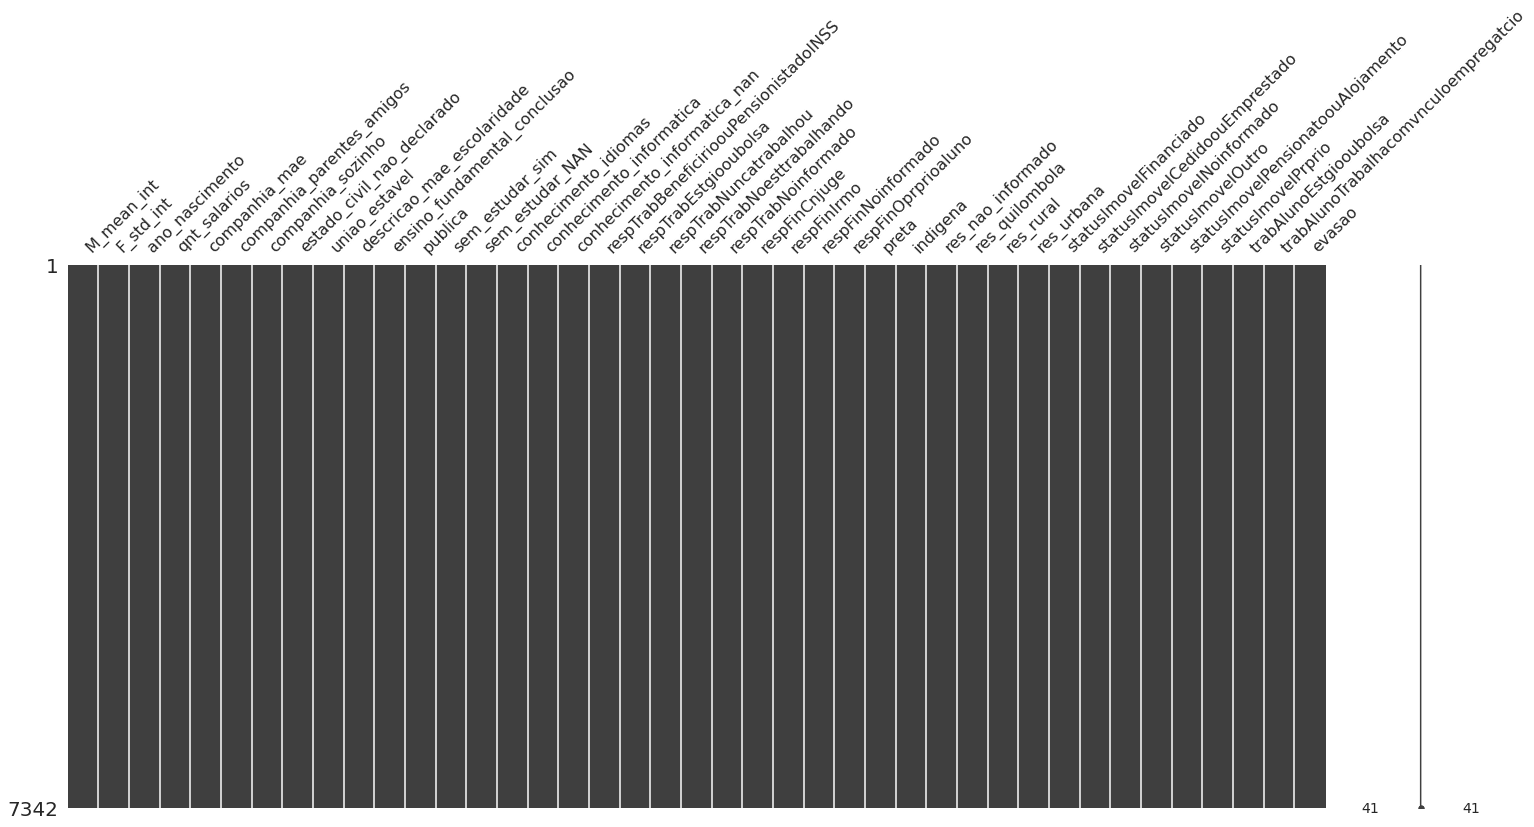

In [60]:
msno.matrix(df)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='evasao'), 
                                                    df['evasao'],
                                                    test_size=0.25, 
                                                    train_size=0.75,
                                                    random_state=42)

# Deep MLP

In [6]:
deep_mlp = keras.Sequential([
                            keras.layers.Dense(32, activation=tf.nn.relu),
                            keras.layers.Dense(32, activation=tf.nn.relu),
                            keras.layers.Dense(2, activation=tf.nn.softmax)
])

deep_mlp.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
hist = deep_mlp.fit(X_train, y_train, 
                 epochs=600,
                 #shuffle = True,
                 #batch_size = 210,
                 validation_split = 0.20,
                 #callbacks=tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)
                 )

Epoch 1/600

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

138/138 [==============================] - 1s 5ms/step - loss: 5.5782 - accuracy: 0.8747 - val_loss: 0.2584 - val_accuracy: 0.9392
Epoch 2/600
138/138 [==============================] - 0s 4ms/step - loss: 1.5532 - accuracy: 0.8787 - val_loss: 0.2615 - val_accuracy: 0.9392
Epoch 3/600
138/138 [==============================] - 0s 4ms/step - loss: 1.3849 - accuracy: 0.8588 - val_loss: 1.1529 - val_accuracy: 0.9392
Epoch 4/600
138/138 [==============================] - 1s 4ms/step - loss: 0.59

In [9]:
deep_mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  1312      
_________________________________________________________________
dense_1 (Dense)              multiple                  1056      
_________________________________________________________________
dense_2 (Dense)              multiple                  66        
Total params: 2,434
Trainable params: 2,434
Non-trainable params: 0
_________________________________________________________________


In [10]:
test_loss, test_acc = deep_mlp.evaluate(X_test, y_test, verbose=2)

58/58 - 0s - loss: 0.1459 - accuracy: 0.9401


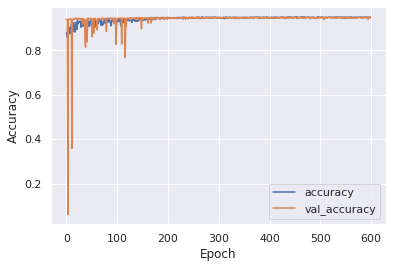

In [11]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

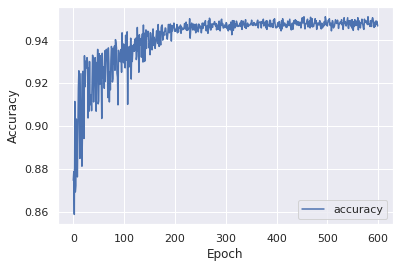

In [12]:
plt.plot(hist.history['accuracy'], label='accuracy')
#plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
predictions = deep_mlp.predict(X_test)

In [14]:
predictions_ = []
for i in range(len(predictions)):
  predictions_.append(np.argmax(predictions[i]))
mat = tf.math.confusion_matrix(y_test, predictions_)

Text(89.18, 0.5, 'predicted label')

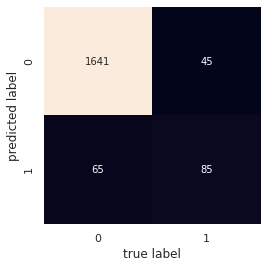

In [15]:
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# LIME

In [16]:
pip install lime

     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283845 sha256=a8dc9104cc2c0c4f3874633ff7875b5167055ae0d22b50796d0563cf754d5422
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [19]:
import lime
import lime.lime_tabular

In [44]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, 
                                                   class_names=['Não Evadido','Evadido'],
                                                   feature_names = X_train.columns,
                                                   discretize_continuous=False)

In [48]:
exp_0_0 = explainer.explain_instance(X_test.iloc[2], 
                                 deep_mlp.predict_proba,
                                  num_features=12)
exp_0_0.show_in_notebook(show_table=True, show_all=False)

In [52]:
exp_1_0 = explainer.explain_instance(X_test.iloc[6], 
                                 deep_mlp.predict_proba,
                                  num_features=12)
exp_1_0.show_in_notebook(show_table=True, show_all=False)

In [55]:
exp_1_1 = explainer.explain_instance(X_test.iloc[14], 
                                 deep_mlp.predict_proba,
                                  num_features=12)
exp_1_1.show_in_notebook(show_table=True, show_all=False)

In [58]:
exp_0_1 = explainer.explain_instance(X_test.iloc[65], 
                                 deep_mlp.predict_proba,
                                  num_features=12)
exp_0_1.show_in_notebook(show_table=True, show_all=False)

In [56]:
for i in range (len(predictions_)):
  if y_test.iloc[i] == 0 and predictions_[i] == 1:
    print(i)
    break;

65
